In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, query
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#take a look at the data in my tables
inspector = inspect(engine)

In [12]:
#Verify the tables names in the database
inspector.get_table_names()

['measurement', 'station']

In [13]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

## Precipitation Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# What is the latest date in the database.  I'll have to look in the measurements table, as that is what has dates in it. 
latestdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latestdate

('2017-08-23')

In [20]:
stationlist = session.query(Station.station).all()
stationlist

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [15]:
# Calculate the date 1 year ago from the last data point in the database
yearagodate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Last Year Date: ", yearagodate)

Last Year Date:  2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
last_year_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_year_data, columns=['Date', 'Precipitation'])
df.set_index(['Date'], inplace = True)
df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [18]:
# Sort the dataframe by date
df.sort_index()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [19]:
#a little bit of data cleaning. How many values in my dataset are null?  If they are null, I should just drop them. 
df.isna().sum()
#it looks like 209.  If I drop these values, I should expect 2021 values after that.

Precipitation    209
dtype: int64

In [20]:
#Drop the NA records
df.dropna()
#I get the expeted number of rows. 

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


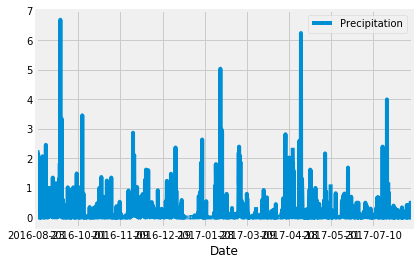

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot();

![precipitation](Images/precipitation.png)

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

## Station Analysis

In [23]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).distinct().count()

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query = '''
SELECT
     station,
     count(station) as count
FROM
     Measurement
GROUP BY station
ORDER BY Count DESC
'''

engine.execute(query).fetchall()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
query = '''
SELECT
    MIN(tobs) as Min_Temp,
    MAX(tobs) as Max_Temp,
    AVG(tobs) as Ave_Temp
FROM
    measurement
WHERE
    station = 'USC00519281'
GROUP BY 
    station
'''
## EXECUTE MAPS TO WITH SESSION AND FETCHALL MAPS TO ALL
engine.execute(query).fetchall()


[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Find the latest date for USC00519281
query = '''
SELECT
    MAX(date) as Max_Date
FROM
    measurement
WHERE
    station = 'USC00519281'
GROUP BY 
    station
'''
## EXECUTE MAPS TO WITH SESSION AND FETCHALL MAPS TO ALL
engine.execute(query).fetchall()



[('2017-08-18',)]

In [27]:
# Calculate the date 1 year ago from the last data point in the database
tobs_yearagodate = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print("Last Year Date: ", tobs_yearagodate)

Last Year Date:  2016-08-18


In [28]:
#Query the data 
query = '''
SELECT
    date as Date,
    tobs as Temp
FROM
    measurement
WHERE
    station = 'USC00519281' AND date > '2016-08-18'
'''
## EXECUTE MAPS TO WITH SESSION AND FETCHALL MAPS TO ALL
temp_data = engine.execute(query).fetchall()
temp_data

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_temps = pd.DataFrame(temp_data, columns=['Date', 'Temps'])
df_temps

,Date,Temps
0,2016-08-19,79.0
1,2016-08-20,81.0
2,2016-08-21,79.0
3,2016-08-22,78.0
4,2016-08-23,77.0
...,...,...
351,2017-08-14,77.0
352,2017-08-15,77.0
353,2017-08-16,76.0
354,2017-08-17,76.0


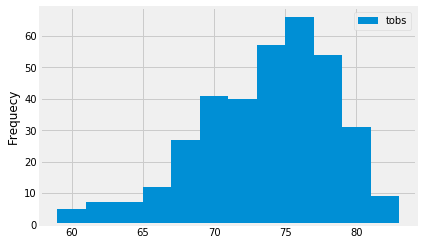

In [30]:
#Plot Histogram

fig, ax = plt.subplots()
ax.hist(df_temps["Temps"], bins=12, label='tobs');
ax.set (ylabel = "Frequecy")
ax.legend(loc = "best");

![precipitation](Images/station-histogram.png)

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [40]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
findings = (calc_temps('2016-08-18', '2016-08-25'))
print(findings)

[(72.0, 78.23076923076923, 81.0)]


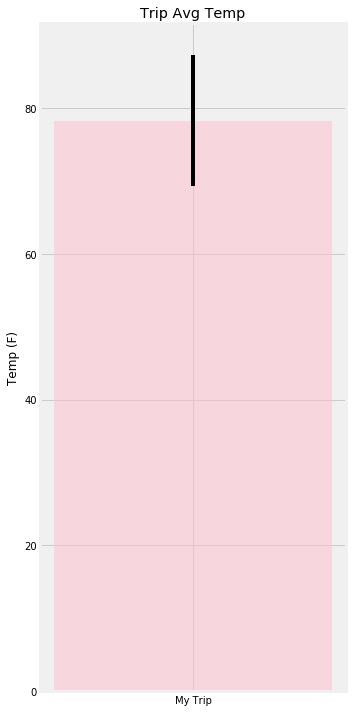

In [43]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#create variables for plotting data
yvalue = findings[0][1]
maxtemp = findings[0][2]
mintemp = findings[0][0]
yerror = (maxtemp-mintemp)


fig, ax = plt.subplots(figsize=(5,10))
ax.bar (x="My Trip", height = yvalue, yerr = yerror, align ="center", alpha = 0.5, color="pink")
ax.set (title = "Trip Avg Temp",
        ylabel = "Temp (F)")
plt.tight_layout()





In [52]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
query = '''
SELECT
    s.station as station,
    SUM(m.prcp) as total_rainfall,
    s.name as name,
    s.latitude,
    s.longitude,
    s.elevation
FROM
    station as s
INNER JOIN 
    measurement as m ON m.station = s.station
WHERE
    m.date >= '2016-08-18'AND m.date <= '2016-08-25'
GROUP BY 
    m.station
ORDER BY
    total_rainfall DESC;
    
'''
totalrainstations = engine.execute(query).fetchall()
totalrainstations


[('USC00516128', 7.250000000000001, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00519281', 6.839999999999999, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 3.8099999999999996, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 2.4099999999999997, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00519523', 2.26, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519397', 0.72, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00517948', 0.0, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]